In [1]:
#|default_exp app

In [2]:
#|export

from fastai.vision.all import *
import gradio as gr


ModuleNotFoundError: No module named 'gradio'

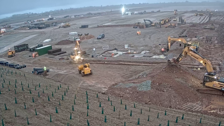

In [3]:
im = PILImage.create("FoundationPouring00.PNG")
im.thumbnail((224,224))
im

In [4]:
#|export
learn=load_learner("metamodel.pkl")

In [5]:
learn.predict(im)

('Foundation Pouring',
 TensorBase(0),
 TensorBase([1.0000e+00, 1.5273e-09, 3.1612e-08]))

In [6]:
#|export
categories = ("Foundation Pouring","Frame Installation","Land Excavation")

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [7]:
classify_image(im)

{'Foundation Pouring': 1.0,
 'Frame Installation': 1.5272558773204992e-09,
 'Land Excavation': 3.161174078059048e-08}

In [8]:
#|export
image = gr.inputs.Image(shape=(512, 512))
label = gr.outputs.Label()
examples = ["FoundationPouring00.PNG","FrameInstallation00.PNG","LandExcavation00.PNG"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch()

NameError: name 'gr' is not defined

In [9]:
from nbdev.export import notebook2script

In [10]:
notebook2script("app.ipynb")

Converted app.ipynb.
